In [17]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

# Link to implementation

Here is a link to `logistic.py` on my repository: https://github.com/Noah5503/Noah5503.github.io/blob/main/posts/blog-post-7-logistic/logistic.py 

# Abstract



# Experiments

In [4]:
import torch
from matplotlib import pyplot as plt

In [13]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

In [14]:
def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

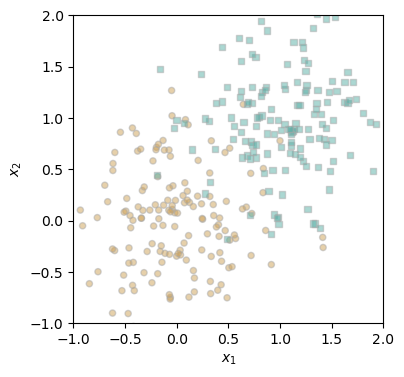

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_classification_data(X, y, ax)
plt.show()

In [22]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

for _ in range(100):
    # add other stuff to e.g. keep track of the loss over time. 
    opt.step(X, y, alpha = 0.1, beta = 0.9)

print(opt.model.w)

tensor([nan, nan, nan])


# Discussion